## 3. Quantum Combinatorial Optimization

### 3.1 Quantum Approximated Optimization Algorithm

#### Quadratic Unconstrained Binary Optimization (QUBO)

$$
\underset{x \in \{0,1\}^{\otimes n}}{\min}  x^t Q x + \beta^t x = \sum_{i} \sum_{j} q_{ij}x_i x_j + \sum_{i} x_i 
$$

In [39]:
import numpy as np

Q = np.array([[1,2,3],[4,5,6],[7,8,9]])
beta = np.array([-3,-2,-1])

In [58]:
from qiskit_optimization import QuadraticProgram
p = len(Q)
mod = QuadraticProgram()
linear = {"x" + str(i) : beta[i] for i in range(p)}
quadratic = {("x"+str(i),"x"+str(j)):Q[i,j] for i in range(p) for j in range(p)}
for i in range(p):
    mod.binary_var(name = "x"+str(i))
mod.minimize(linear = linear , quadratic = quadratic)
print(mod.prettyprint())

Problem name: 

Minimize
  x0^2 + 6*x0*x1 + 10*x0*x2 + 5*x1^2 + 14*x1*x2 + 9*x2^2 - 3*x0 - 2*x1 - x2

Subject to
  No constraints

  Binary variables (3)
    x0 x1 x2



In [41]:
from qiskit.providers.aer import QasmSimulator
from qiskit.utils import QuantumInstance
backend = QasmSimulator()
quantum_instance = QuantumInstance(backend)

In [42]:
from qiskit.algorithms import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
repeat = 2
solver = QAOA(quantum_instance=quantum_instance,reps = repeat)
optimizer = MinimumEigenOptimizer(solver)
result = optimizer.solve(mod)

In [43]:
result.x

array([1., 0., 0.])

In [44]:
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
solver = NumPyMinimumEigensolver()
optimizer = MinimumEigenOptimizer(solver)
result = optimizer.solve(mod)

In [45]:
result.x

array([1., 0., 0.])

### 3.2 Maxcut Problem

[[0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]]


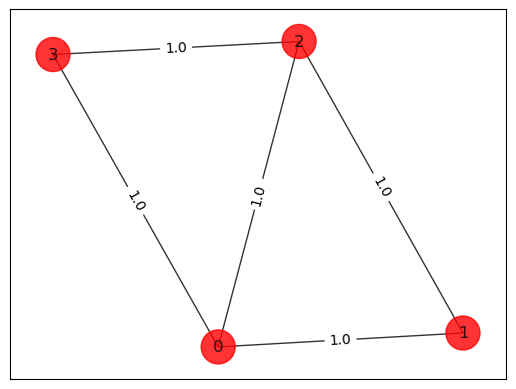

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
n = 4  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

draw_graph(G, colors, pos)
# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
print(w)

In [62]:
from qiskit_optimization.applications import Maxcut
max_cut = Maxcut(w)
mod = max_cut.to_quadratic_program()
print(mod.prettyprint())

Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 2*x_0*x_2 - 2*x_0*x_3 - 2*x_1*x_2 - 2*x_2*x_3 + 3*x_0 + 2*x_1
  + 3*x_2 + 2*x_3

Subject to
  No constraints

  Binary variables (4)
    x_0 x_1 x_2 x_3



In [63]:
repeat = 2
solver = QAOA(quantum_instance=quantum_instance,reps = repeat)
optimizer = MinimumEigenOptimizer(solver)
result = optimizer.solve(mod)
result.x

array([1., 0., 1., 0.])

In [64]:
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
solver = NumPyMinimumEigensolver()
optimizer = MinimumEigenOptimizer(solver)
result = optimizer.solve(mod)
result.x

array([1., 0., 1., 0.])

### 3.3 Travelling Sales Mans Problem

distance
 [[ 0. 48. 91.]
 [48.  0. 63.]
 [91. 63.  0.]]


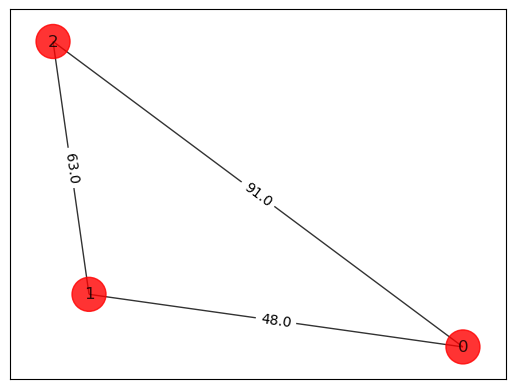

In [66]:
from qiskit_optimization.applications import Tsp

# Generating a graph of 3 nodes
n = 3
num_qubits = n**2
tsp = Tsp.create_random_instance(n, seed=123)
adj_matrix = nx.to_numpy_matrix(tsp.graph)
print("distance\n", adj_matrix)

colors = ["r" for node in tsp.graph.nodes]
pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
draw_graph(tsp.graph, colors, pos)

In [70]:
qp = tsp.to_quadratic_program()
print(qp.prettyprint())

Problem name: TSP

Minimize
  48*x_0_0*x_1_1 + 48*x_0_0*x_1_2 + 91*x_0_0*x_2_1 + 91*x_0_0*x_2_2
  + 48*x_0_1*x_1_0 + 48*x_0_1*x_1_2 + 91*x_0_1*x_2_0 + 91*x_0_1*x_2_2
  + 48*x_0_2*x_1_0 + 48*x_0_2*x_1_1 + 91*x_0_2*x_2_0 + 91*x_0_2*x_2_1
  + 63*x_1_0*x_2_1 + 63*x_1_0*x_2_2 + 63*x_1_1*x_2_0 + 63*x_1_1*x_2_2
  + 63*x_1_2*x_2_0 + 63*x_1_2*x_2_1

Subject to
  Linear constraints (6)
    x_0_0 + x_0_1 + x_0_2 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 == 1  'c2'
    x_0_0 + x_1_0 + x_2_0 == 1  'c3'
    x_0_1 + x_1_1 + x_2_1 == 1  'c4'
    x_0_2 + x_1_2 + x_2_2 == 1  'c5'

  Binary variables (9)
    x_0_0 x_0_1 x_0_2 x_1_0 x_1_1 x_1_2 x_2_0 x_2_1 x_2_2



In [71]:
from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
mod = qp2qubo.convert(qp)

In [74]:
repeat = 3
solver = QAOA(quantum_instance=quantum_instance,reps = repeat)
optimizer = MinimumEigenOptimizer(solver)
result = optimizer.solve(mod)
result.x

array([0., 0., 1., 0., 1., 0., 1., 0., 0.])

In [75]:
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
solver = NumPyMinimumEigensolver()
optimizer = MinimumEigenOptimizer(solver)
result = optimizer.solve(mod)
result.x

array([1., 0., 0., 0., 1., 0., 0., 0., 1.])